In [2]:
from sklearn import datasets
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
import keras
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1329515698687220713
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11270160384
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3428942921048410643
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [4]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [5]:
test_data = scipy.io.loadmat('test_32x32.mat')
train_data = scipy.io.loadmat('train_32x32.mat')

In [6]:
X_train = train_data['X'].T
X_test = test_data['X'].T
y_train = train_data['y']
y_test = test_data['y']

In [7]:
y_test[y_test == 10] = 0
y_train[y_train == 10] = 0

In [8]:
batch_size = 128
num_classes = 10
epochs = 1
input_shape = train_data['X'].shape[:3]

In [9]:
X_train = X_train.reshape(X_train.shape[0], input_shape[0], input_shape[1], input_shape[2])
X_test = X_test.reshape(X_test.shape[0], input_shape[0], input_shape[1], input_shape[2])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [28]:
conv_l1 = 48
conv_l2 = 64
conv_l3 = 128
conv_l4 = 160
dense_l1 = 2400
dense_l2 = 2400
dropout = 0.3

In [29]:
model = Sequential()
model.add(Conv2D(conv_l1, kernel_size=(3,3), input_shape = input_shape, activation="relu",padding='same'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(conv_l2, kernel_size=(3,3), activation="relu",padding='same'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(conv_l3, kernel_size=(3,3), activation="relu",padding='same'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(conv_l4, kernel_size=(3,3), activation="relu",padding='same'))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(dense_l1, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(dense_l2, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model_hist = model.fit(X_train,
                       y_train,
                       batch_size=128,
                       epochs=20,
                       verbose=1,
                       validation_split = .1)

Train on 65931 samples, validate on 7326 samples
Epoch 1/20
65931/65931 [==============================] - 31s 471us/step - loss: 1.8500 - acc: 0.3658 - val_loss: 6.8017 - val_acc: 0.1960
Epoch 2/20
65931/65931 [==============================] - 28s 427us/step - loss: 0.9223 - acc: 0.6967 - val_loss: 1.0370 - val_acc: 0.7228
Epoch 3/20
65931/65931 [==============================] - 28s 427us/step - loss: 0.6639 - acc: 0.7884 - val_loss: 1.3993 - val_acc: 0.7172
Epoch 4/20
65931/65931 [==============================] - 28s 426us/step - loss: 0.5778 - acc: 0.8165 - val_loss: 0.6992 - val_acc: 0.8206
Epoch 5/20
65931/65931 [==============================] - 28s 425us/step - loss: 0.5309 - acc: 0.8350 - val_loss: 1.0150 - val_acc: 0.7824
Epoch 6/20
65931/65931 [==============================] - 28s 427us/step - loss: 0.4975 - acc: 0.8431 - val_loss: 0.5223 - val_acc: 0.8434
Epoch 7/20
65931/65931 [==============================] - 28s 427us/step - loss: 0.4756 - acc: 0.8500 - val_loss: 0.4

In [25]:
model.evaluate(X_test, y_test)

26032/26032 [==============================] - 4s 163us/step


[0.41116579795243663, 0.895820528580209]

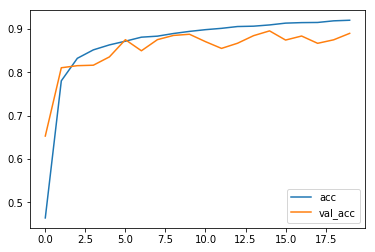

In [26]:
pd.DataFrame(model_hist.history)[['acc','val_acc']].plot()
plt.show()

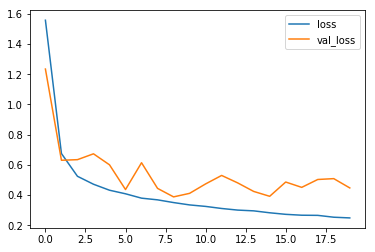

In [27]:
pd.DataFrame(model_hist.history)[['loss','val_loss']].plot()
plt.show()